In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# REGRESION LINEAL SIMPLE
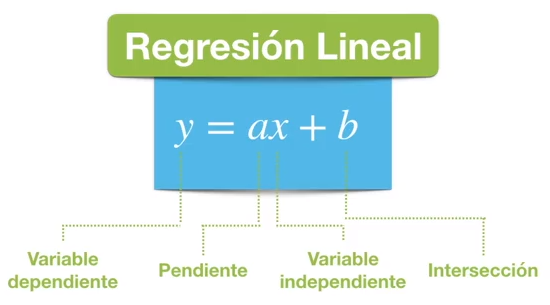
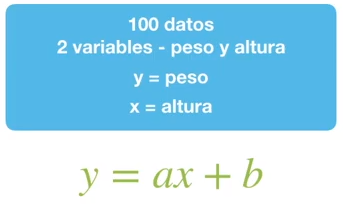

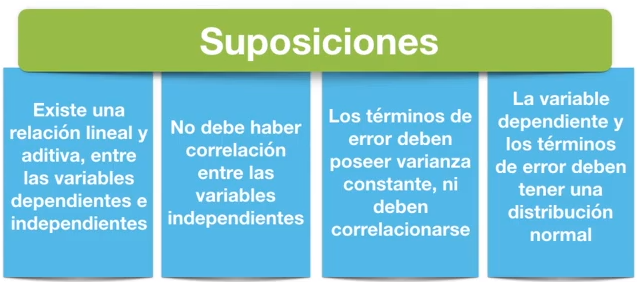

# SCIKIT LEARN
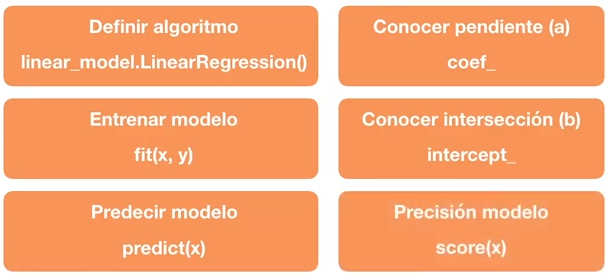

## 1.- Exploración de datos

In [3]:
boston = load_boston()
boston.keys()

c:\Users\alk10\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [4]:
# Caracteristicas del dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# Cantidad de datos
boston.data.shape

(506, 13)

In [6]:
# Nombre de columnas
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## 2.- Creación del modelo

In [7]:
# Parametros para modelo
X = boston.data[:, np.newaxis, 5]
y = boston.target
print(X.shape[0], y.shape[0])

506 506


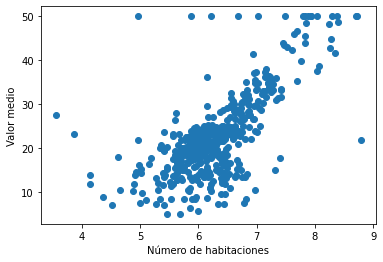

In [8]:
# Grafica
plt.scatter(X, y)
plt.xlabel('Número de habitaciones')
plt.ylabel('Valor medio')
plt.show()

In [9]:
# Separar para test y train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
# Modelo a utilizar
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

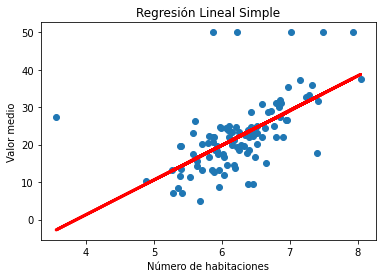

In [11]:
# Grafica de los datos junto al modelo
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
plt.xlabel('Número de habitaciones')
plt.ylabel('Valor medio')
plt.show()

Al comparar, manualmente, los datos entre y_test y y_pred, podemos determinar que el modelo no es del todo eficiente.

Y podemos verificar eso graficando el modelo. Con esto podemos determinar que este modelo no es bueno para este conjunto de datos.

## 3.- Datos del modelo

In [12]:
# Valor de la pendiente o coeficiente "a"
print(lr.coef_)

[9.26753353]


In [13]:
# Valor de la interseccion o coeficiente "b"
print(lr.intercept_)

-35.78196167208705


La ecuación del modelo es igual a:

y = 9,37 X + (-36,17)

In [14]:
# Precisión del modelo
print(lr.score(X_train, y_train))

0.5239702611646129


El valor de Score va de 0 a 1, por lo que podemos decir que la precisión del modelo no es muy buena ya que el modelo se adapta al 51% de los datos.

# STATSMODEL

In [72]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.datasets import spector

## 1.- Exploración de datos

In [19]:
data = spector.load()

In [21]:
# Información en el dataset
data.keys()

dict_keys(['data', 'names', 'endog', 'exog', 'endog_name', 'exog_name', 'raw_data'])

In [48]:
data.data.head()

,GPA,TUCE,PSI,GRADE
0,2.66,20.0,0.0,0.0
1,2.89,22.0,0.0,0.0
2,3.28,24.0,0.0,0.0
3,2.92,12.0,0.0,0.0
4,4.00,21.0,0.0,1.0


In [24]:
# Cantidad de datos en el dataset
data.data.shape

(32, 4)

In [50]:
# Información de las columnas
data.names

['GPA', 'TUCE', 'PSI', 'GRADE']

## 2.- Creación del modelo

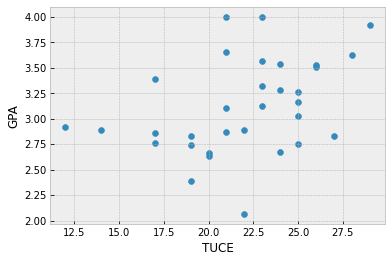

In [64]:
# Grafica
plt.scatter(data.data['TUCE'], data.data['GPA'])
plt.xlabel('TUCE')
plt.ylabel('GPA')
plt.show()

In [73]:
modelo = 'TUCE~GPA'
lr = smf.ols(formula=modelo, data=data.data)
res = lr.fit()

In [68]:
pred = res.get_prediction().summary_frame(alpha=0.05)
pred.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,20.458484,0.912086,18.595756,22.321213,12.761123,28.155845
1,21.202541,0.721214,19.729626,22.675457,13.590112,28.814971
2,22.464203,0.685875,21.063459,23.864948,14.865408,30.062999
3,21.299592,0.703516,19.862821,22.736363,13.694074,28.905111
4,24.793426,1.400531,21.933161,27.653691,16.795881,32.790971


eval_env: 1


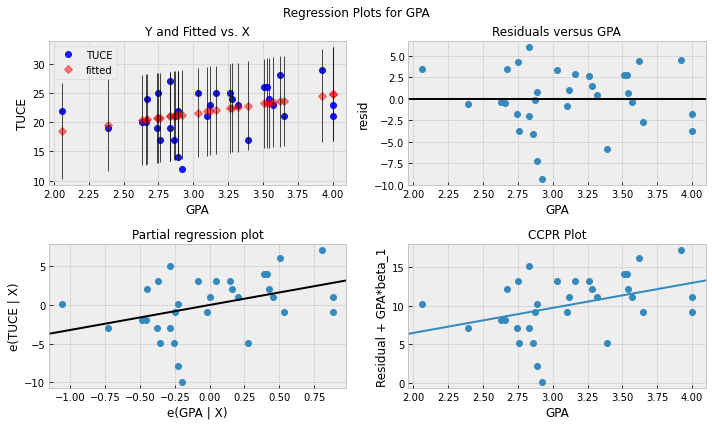

In [75]:
# Grafica del modelo
fig = plt.figure(figsize=(10, 6))
sm.graphics.plot_regress_exog(res, 'GPA', fig=fig)
plt.show()

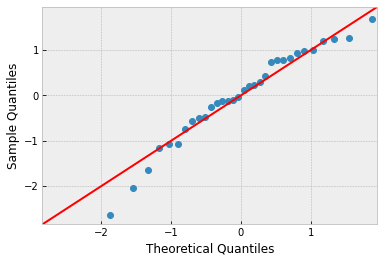

In [76]:
resid = res.resid

fig = sm.qqplot(resid, fit=True, line='45')
plt.show()

## 3.- Datos del modelo

In [63]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                   TUCE   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.121
Method:                 Least Squares   F-statistic:                     5.284
Date:                Wed, 01 Feb 2023   Prob (F-statistic):             0.0287
Time:                        15:27:51   Log-Likelihood:                -85.866
No. Observations:                  32   AIC:                             175.7
Df Residuals:                      30   BIC:                             178.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.8533      4.434      2.673      0.0

La ecuación del modelo es igual a:

y = 3,23 X + 11,85

El valor de R2 va de 0 a 1, por lo que podemos decir que la precisión del modelo no es muy buena ya que el modelo se adapta al 15% de los datos.